In [1]:
import json

In [2]:
with open('./africa_codes.txt', 'r') as code_file:
    code_list = [code.strip() for code in code_file.readlines()]

In [3]:
all_data = {}
for code in code_list:
    with open('./africa/'+code+'.json', 'r') as json_file:
        all_data[code] = json.load(json_file)

In [4]:
all_data[code_list[0]]

{'meta': {'country': 'DZ',
  'start': '2014-01-01T00:00:00',
  'stop': '2019-02-23T15:43:09'},
 'isps': [{'asn': 36947,
   'pct': 51.63580278889584,
   'name': 'ALGTEL-AS',
   'outages': [['2014-02-01T08:00:00', '2014-03-01T00:00:00'],
    ['2014-06-05T00:00:00', '2014-06-06T00:00:00'],
    ['2015-09-04T16:00:00', '2015-09-05T00:00:00'],
    ['2015-12-16T08:00:00', '2015-12-17T00:00:00']]},
  {'asn': 327712,
   'pct': 22.264507288802015,
   'name': 'ATM',
   'outages': [['2014-06-05T00:00:00', '2014-06-06T00:00:00'],
    ['2014-09-17T08:00:00', '2014-09-17T16:00:00'],
    ['2014-12-04T00:00:00', '2014-12-04T08:00:00'],
    ['2015-06-14T16:00:00', '2015-06-15T00:00:00'],
    ['2015-09-04T16:00:00', '2015-09-05T00:00:00'],
    ['2015-12-16T08:00:00', '2015-12-17T00:00:00']]},
  {'asn': 327931,
   'pct': 13.55176908516527,
   'name': 'Optimum-Telecom-Algeria',
   'outages': [['2015-12-16T08:00:00', '2015-12-17T00:00:00']]},
  {'asn': 33779,
   'pct': 12.075513761640384,
   'name': 'watani

In [5]:
all_outages = []
for code in code_list:
    for isps in all_data[code]['isps']:
        all_outages += isps['outages']

In [18]:
all_as_name = []
the_number_of_ass = []
for code in code_list:
    the_number_of_ass.append(len(all_data[code]['isps']))
    for isps in all_data[code]['isps']:
        all_as_name.append(isps['name'])
print(len(list(set(all_as_name))))
print(sum(the_number_of_ass) / len(the_number_of_ass))

124
4.666666666666667


In [77]:
outage_number = []
texts = []
for code in code_list:
    the_number_of_ass.append(len(all_data[code]['isps']))
    result = 0
    text = ""
    for isps in all_data[code]['isps']:
        result += len(isps['outages'])
        text += isps['name'] + '\n'
    outage_number.append(result)
    texts.append(text)

In [83]:
print(code_list[-5])
print(outage_number)

SS
[15, 26, 11, 26, 6, 25, 1, 71, 44, 4, 29, 19, 23, 22, 17, 49, 52, 51, 30, 3, 25, 48, 155, 11, 31, 76, 69]


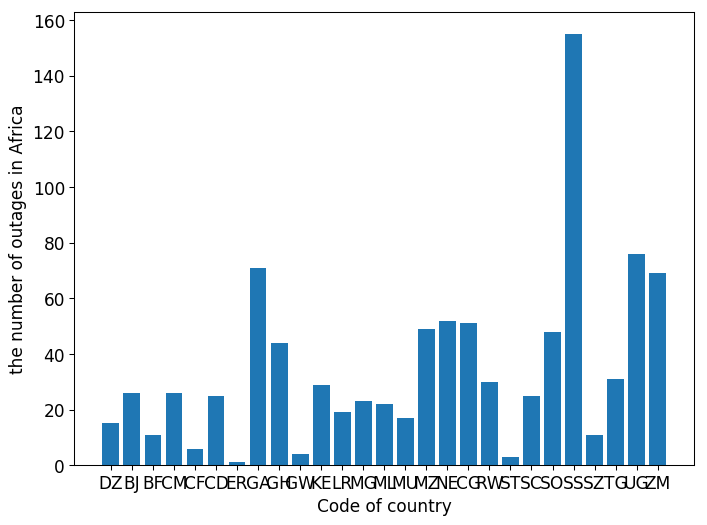

In [89]:
import matplotlib.pyplot as plt

my_dpi = 94
plt.rcParams.update({'font.size': 13})

plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.bar(code_list, outage_number)

plt.ylabel('the number of outages in Africa')
plt.xlabel('Code of country')

plt.show()

In [93]:
#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
d = {'code':code_list, 'outages':outage_number, 'text':texts}
df = pd.DataFrame(data=d)

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        #colorscale = scl,
        autocolorscale = True,
        locations = df['code'],
        z = df['outages'].astype(float),
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "the number of outages")
        ) ]

layout = dict(
        #title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='africa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~HyungJiny/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [98]:
location = geolocator.geocode(code_list[0])
print(location.fip)

AttributeError: 'Location' object has no attribute 'fip'

In [96]:
import plotly.figure_factory as ff

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    values=df['outages'], scope=code_list,
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population by County', title='California and Nearby States'
)
py.iplot(fig, filename='choropleth_california_and_surr_states_outlines')

TypeError: create_choropleth() missing 1 required positional argument: 'fips'

In [6]:
all_outages_starttime = []
for outages in all_outages:
    all_outages_starttime.append(outages[0])

In [7]:
all_outages_starttime = list(set(all_outages_starttime))

In [8]:
outage_groups = {}
for starttime in all_outages_starttime:
    outage_groups[starttime] = []

In [9]:
for code in code_list:
    for isps in all_data[code]['isps']:
        for outage in isps['outages']:
            outage_groups[outage[0]].append(code+'_'+isps['name'])

In [10]:
for starttime in all_outages_starttime:
    outage_groups[starttime] = list(set(outage_groups[starttime]))

In [11]:
for starttime in all_outages_starttime:
    if len(outage_groups[starttime]) == 1:
        outage_groups.pop(starttime)

In [12]:
len(outage_groups.keys())

61

In [23]:
from geopy.geocoders import Nominatim

location = geolocator.geocode("KR")
print(location.address)
print(location.latitude)
print(location.longitude)

대한민국
36.5581914
127.9408564


In [29]:
lat_list = []
long_list = []
for code in code_list:
    location = geolocator.geocode(code)
    lat_list.append(location.latitude)
    long_list.append(location.longitude)

In [30]:
import pandas as pd

d = {'code':code_list, 'lat':lat_list, 'long':long_list}
africa = pd.DataFrame(data=d)

In [37]:
outage_groups

{'2014-04-23T16:00:00': ['BJ_ETISALAT-AS', 'SS_MTN', 'BJ_BENINTELECOM'],
 '2015-04-03T08:00:00': ['GA_iPi9', 'GA_Gabon-Telecom'],
 '2015-03-12T00:00:00': ['GA_iPi9', 'GA_Gabon-Telecom'],
 '2016-06-26T08:00:00': ['GH_GLOMOBILE', 'GA_Airtel'],
 '2015-03-01T00:00:00': ['UG_NITA', 'KE_WANANCHI-', 'SS_TELECOM-4G'],
 '2014-06-05T00:00:00': ['ZM_ZAIN-ZAMBIA',
  'CM_ORANGE',
  'KE_ACCESSKENYA-KE',
  'SC_AirtelSeychelles',
  'GH_TIGO-AS',
  'CD_CELTEL-DRC',
  'GH_zain-as',
  'GA_iPi9',
  'CM_HTT',
  'GH_SCANCOM',
  'ZM_ZAMTEL',
  'KE_JTL',
  'UG_ZAINUGAS',
  'NE_ORANGE-NIGER',
  'MG_GULFSAT-AS',
  'KE_SAFARICOM-LIMITED',
  'RW_AIRTEL-',
  'RW_tigo-rw-as',
  'MZ_moztel-as',
  'SZ_SWAZINET',
  'GH_SURFLINEGHANAAS',
  'CD_Orioncom',
  'GH_GLOMOBILE',
  'BF_Orange-',
  'BJ_BENINTELECOM',
  'ML_SOTELMABGP',
  'CM_CAMNET-AS',
  'MU_MauritiusTelecom',
  'UG_SEACOM-AS',
  'CD_VODACOM-CONGO',
  'SC_CWSeychelles-AS',
  'BJ_ISOCEL',
  'SS_RCS',
  'ZM_afczas',
  'ZM_LIQUID-AS',
  'DZ_ATM',
  'UG_UGANDA-TEL

In [57]:
key = '2015-12-16T08:00:00'
print(outage_groups[key][0].split('_')[0])
print(len(outage_groups[key]))

ZM
97


In [63]:
from geopy.exc import GeocoderTimedOut

start_lat = []
start_lon = []
end_lat = []
end_lon = []

for i in range(len(outage_groups[key])-1):
    try:
        code = outage_groups[key][i].split('_')[0]
        location = geolocator.geocode(code, timeout=None)
        start_lat.append(location.latitude)
        start_lon.append(location.longitude)
        code = outage_groups[key][i+1].split('_')[0]
        location = geolocator.geocode(code, timeout=None)
        end_lat.append(location.latitude)
        end_lon.append(location.longitude)
    except GeocoderTimedOut:
        continue

/Users/hyungjin/Downloads/country-outage-pop-viz-master/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning:

`timeout=None` has been passed to a geocoder call. Using default geocoder timeout. In geopy 2.0 the behavior will be different: None will mean "no timeout" instead of "default geocoder timeout". Pass geopy.geocoders.base.DEFAULT_SENTINEL instead of None to get rid of this warning.

/Users/hyungjin/Downloads/country-outage-pop-viz-master/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning:

`timeout=None` has been passed to a geocoder call. Using default geocoder timeout. In geopy 2.0 the behavior will be different: None will mean "no timeout" instead of "default geocoder timeout". Pass geopy.geocoders.base.DEFAULT_SENTINEL instead of None to get rid of this warning.



In [65]:
print(len(start_lat), len(start_lon), len(end_lat), len(end_lon))

91 91 85 85


In [66]:
d = {'start_lat':start_lat[:85], 'start_lon':start_lon[:85], 'end_lat':end_lat, 'end_lon':end_lon}
africa_as_path = pd.DataFrame(data=d)

In [67]:
import plotly.plotly as py
import pandas as pd

airports = [ dict(
        type = 'scattergeo',
        lon = africa['long'],
        lat = africa['lat'],
        hoverinfo = 'text',
        text = africa['code'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( africa_as_path ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ africa_as_path['start_lon'][i], africa_as_path['end_lon'][i] ],
            lat = [ africa_as_path['start_lat'][i], africa_as_path['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            )
            #opacity = float(africa_as_path['cnt'][i])/float(africa_as_path['cnt'].max()),
        )
    )
    
layout = dict(
        #title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False, 
        geo = dict(
            scope='africa',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data=flight_paths + airports, layout=layout )
py.iplot( fig, filename='d3-flight-paths' )